# Import and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('clinic.csv')

In [4]:
df.head(10)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005
5,11/4/2019 0:00,$586.80,$-,$13.00,LOCUM,INSURANCE,OUTPATIENT,19:22:09,20:14:03,20:15:03,DR64040I4,C10006
6,11/13/2019 0:00,$570.18,$92.50,$15.00,ANCHOR,INSURANCE,OUTPATIENT,9:14:45,10:51:01,10:51:33,DR15154H4,C10007
7,11/2/2019 0:00,$493.85,$-,$30.00,FLOATING,INSURANCE,OUTPATIENT,10:35:00,10:57:26,10:57:36,DR60065B4,C10008
8,11/4/2019 0:00,$470.39,$-,$35.52,ANCHOR,HMO,OUTPATIENT,8:47:59,9:59:22,9:59:29,DR15154H4,C10009
9,11/2/2019 0:00,$468.02,$10.00,$23.91,LOCUM,HMO,OUTPATIENT,10:01:25,10:32:38,10:35:17,DR04556Z4,C10010


In [5]:
df.dtypes

Date                      object
 Medication Revenue       object
  Lab Cost                object
 Consultation Revenue     object
Doctor Type               object
Financial Class           object
Patient Type              object
Entry Time                object
Post-Consultation Time    object
Completion Time           object
Doctor                    object
Patient ID                object
dtype: object

1.There are some spaces in columns names  
2.All data types are object and we have to change the data types (There are dates and numerics)

In [6]:
df.shape


(29999, 12)

In [8]:
df.nunique()

Date                         13
 Medication Revenue        4280
  Lab Cost                  200
 Consultation Revenue       241
Doctor Type                   3
Financial Class               5
Patient Type                  1
Entry Time                20629
Post-Consultation Time    21357
Completion Time           21385
Doctor                      199
Patient ID                29999
dtype: int64

This data is for 13 days , 29999 patients, 199 Doctors , 5 financial class , and 3 doctor type.

In [9]:
df.isna().sum()

Date                      0
 Medication Revenue       0
  Lab Cost                0
 Consultation Revenue     0
Doctor Type               0
Financial Class           0
Patient Type              0
Entry Time                0
Post-Consultation Time    0
Completion Time           0
Doctor                    0
Patient ID                0
dtype: int64

# Data cleaning

Remove spaces for columns names

In [10]:
df.columns=df.columns.str.strip()
df.columns

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

Change data types

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Entry Time']=pd.to_datetime(df['Entry Time'])
df['Post-Consultation Time']=pd.to_datetime(df['Post-Consultation Time'])
df['Completion Time']=pd.to_datetime(df['Completion Time'])

In [13]:
def clean_text(x):
    x = x.replace('$','')
    x = x.replace(',','')
    x = x.replace('-','')
    x = x.replace(' ','')
    x =pd.to_numeric(x)
    return x

In [14]:
df['Medication Revenue']=df['Medication Revenue'].apply(clean_text) 
df['Lab Cost']=df['Lab Cost'].apply(clean_text)
df['Consultation Revenue']=df['Consultation Revenue'].apply(clean_text)

In [15]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2023-02-04 08:35:45,2023-02-04 09:17:54,2023-02-04 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,NaN,15.00,ANCHOR,INSURANCE,OUTPATIENT,2023-02-04 19:19:16,2023-02-04 21:02:36,2023-02-04 21:24:07,DR09451Z4,C10002
2,2019-11-02,660.00,NaN,21.17,ANCHOR,HMO,OUTPATIENT,2023-02-04 10:46:52,2023-02-04 11:56:25,2023-02-04 12:06:28,DR17400I4,C10003
3,2019-11-06,600.00,NaN,NaN,ANCHOR,MEDICARE,OUTPATIENT,2023-02-04 09:38:34,2023-02-04 10:55:50,2023-02-04 10:58:02,DR09451Z4,C10004
4,2019-11-01,591.60,NaN,12.00,ANCHOR,INSURANCE,OUTPATIENT,2023-02-04 11:16:21,2023-02-04 12:06:49,2023-02-04 12:06:54,DR15154H4,C10005


In [16]:
df=df.fillna(0)

Add a column to the total revenue

In [17]:
df['Total Revenue']=df['Medication Revenue']+df['Lab Cost']+df['Consultation Revenue']

Here I will split the hour of entry from the date

In [18]:
df['Entry hour']=df['Entry Time'].dt.hour

# Which hour has the highest number of visits?

In [19]:
df.groupby(['Entry hour'])['Patient ID'].count().sort_values(ascending=False)

Entry hour
9     4297
10    3680
8     3489
11    3306
14    3030
18    2600
19    2269
15    1847
12    1446
20    1358
16    1249
21     500
13     426
22     238
17     219
23      33
7       12
Name: Patient ID, dtype: int64

<AxesSubplot:xlabel='Entry hour'>

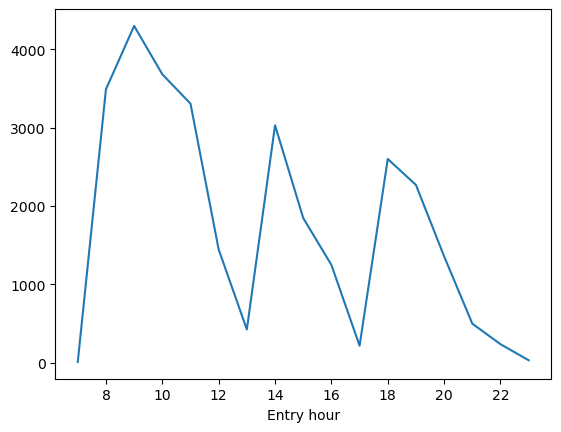

In [21]:
df.groupby(['Entry hour'])['Patient ID'].count().plot()

# Which doctors have the highest visits?

In [22]:
df.groupby(['Doctor'])['Patient ID'].count().sort_values(ascending=False)

Doctor
DR15416D4    679
DR08910I4    669
DR09429C4    651
DR09451Z4    644
DR05350C4    611
            ... 
DR07072F4     10
DR18264H4      7
DR64010G4      6
DR15533J4      5
DR14993D4      3
Name: Patient ID, Length: 199, dtype: int64

<AxesSubplot:xlabel='Doctor'>

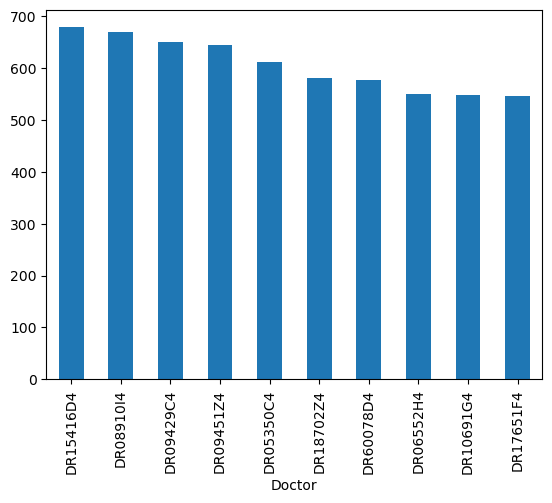

In [24]:
df.groupby(['Doctor'])['Patient ID'].count().nlargest(n=10).plot(kind='bar')

# Financial class and total revenue

<AxesSubplot:ylabel='Total Revenue'>

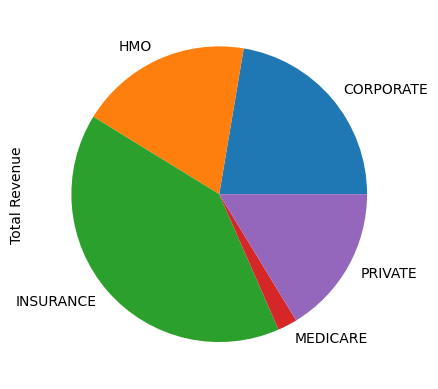

In [26]:
df.groupby(['Financial Class'])['Total Revenue'].sum().plot(kind='pie')

<AxesSubplot:ylabel='Patient ID'>

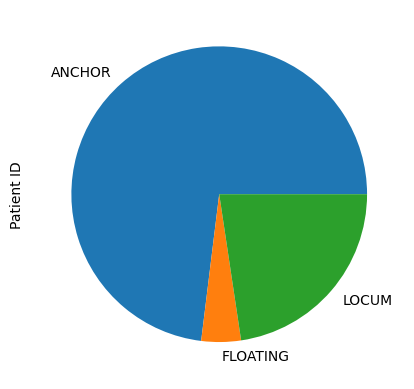

In [32]:
df.groupby(['Doctor Type'])['Patient ID'].count().plot(kind='pie')

nearly 75% from visits are for ANCHOR doctors .

In [33]:
df.groupby(['Date'])['Patient ID'].count().sort_values(ascending=False)

Date
2019-11-11    3618
2019-11-04    3365
2019-11-12    2892
2019-11-06    2813
2019-11-05    2798
2019-11-07    2673
2019-11-01    2518
2019-11-08    2405
2019-11-09    1539
2019-11-02    1471
2019-11-13    1358
2019-11-03    1301
2019-11-10    1248
Name: Patient ID, dtype: int64

<AxesSubplot:xlabel='Date'>

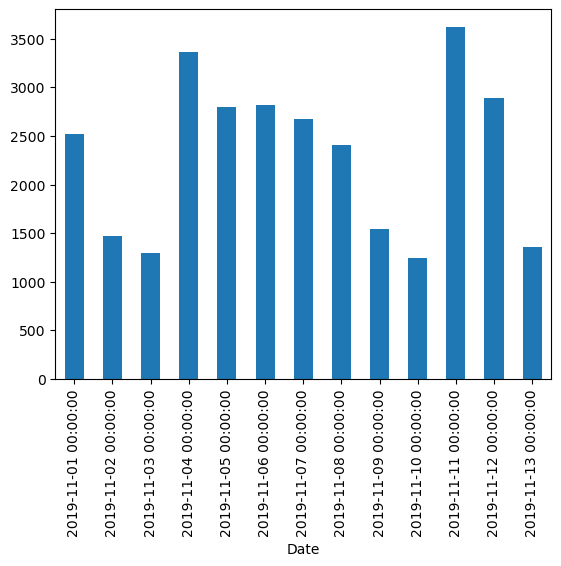

In [34]:
df.groupby(['Date'])['Patient ID'].count().plot(kind='bar')